In [70]:
import os
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import numpy as np

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob


In [71]:
keys = pd.read_csv('/content/drive/My Drive/IST 736 Project/Twitter Info.csv')

consumer_key = keys['Value'][0]
consumer_secret = keys['Value'][1]
access_token = keys['Value'][2]
access_token_secret = keys['Value'][3]

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [72]:
# from: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/analyze-tweet-sentiment-in-python/


def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    #return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
    return " ".join(re.sub("([^A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


In [73]:
# from: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/analyze-tweet-sentiment-in-python/


def remove_url_2(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
    #return " ".join(txt).split()

In [74]:
# set number of tweets to pull
n_tweets = 250

In [75]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import sklearn

stopwords = nltk.corpus.stopwords.words('english')

stopwords2 = sklearn.feature_extraction.text.ENGLISH_STOP_WORDS

new_stopwords1 = ['rt', 'retweet', 'amp', 'the', 'of', 'RT']

new_stopwords = stopwords.append(stopwords2)

new_stopwords2 = new_stopwords1.append(new_stopwords)

regex1 = r'\b[a-zA-Z]{4,}\b'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
tweet_pull_tweets = []
column_names = []
def tweet_pull(searchhashtag):
  # Create a custom search term and define the number of tweets
  p = "#" + searchhashtag + "-filter:retweets"

  search_term = p

  tweets = tw.Cursor(api.search,
                      q=search_term,
                      tweet_mode = 'extended',
                      lang="en",
                      since='2010-10-01').items(n_tweets)

    # Remove URLs
  tweets_no_urls = [remove_url(tweet.full_text) for tweet in tweets]
  print(tweets_no_urls[1])
  tweet_pull_tweets.append(tweets_no_urls)
  column_names.append(searchhashtag)
 
  # vectorize the full tweets 

  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.feature_extraction.text import TfidfVectorizer
  from wordcloud import WordCloud

  myCV1 = CountVectorizer(input="content", stop_words = new_stopwords2, token_pattern = regex1)

  CV = myCV1.fit_transform(tweets_no_urls)

  MyColumnNames= myCV1.get_feature_names()
  VectorizedDF_Text=pd.DataFrame(CV.toarray(),columns=MyColumnNames)

  new_data_frame = VectorizedDF_Text
  
  # build WordCloud
  d1 =VectorizedDF_Text.sum(axis = 0)

  d2 = pd.DataFrame(d1.iloc[2:,].sort_values(ascending = False)).reset_index()

  d2.columns = ['Word','Count']

  tuples = [tuple(i) for i in d2.values]

  wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
  plt.figure(figsize=(11,7))
  plt.imshow(wordcloud) 
  plt.axis('off')
  plt.show()

  # add label, create dataframe output
  VectorizedDF_Text['Label'] = searchhashtag
  VectorizedDF_Text['Vectorizer'] = "CV (Not Binary)"

  Empty_DF = DataFrame()
  
  output = pd.concat([Empty_DF, VectorizedDF_Text], join = "outer")

  myCV2 = CountVectorizer(input="content", binary = True, stop_words = new_stopwords2, token_pattern = regex1)

  CV = myCV2.fit_transform(tweets_no_urls)

  MyColumnNames= myCV2.get_feature_names()
  VectorizedDF_Text=pd.DataFrame(CV.toarray(),columns=MyColumnNames)

  # add label, create dataframe output
  VectorizedDF_Text['Label'] = searchhashtag
  VectorizedDF_Text['Vectorizer'] = "CV (Binary)"

  Empty_DF = DataFrame()
  
  output = pd.concat([output, VectorizedDF_Text], join = "outer")
  
  myTF1 = TfidfVectorizer(input="content", stop_words = new_stopwords2, token_pattern = regex1)

  CV = myTF1.fit_transform(tweets_no_urls)

  MyColumnNames= myTF1.get_feature_names()
  VectorizedDF_Text=pd.DataFrame(CV.toarray(),columns=MyColumnNames)

  # add label, create dataframe output
  VectorizedDF_Text['Label'] = searchhashtag
  VectorizedDF_Text['Vectorizer'] = "TF_IDF"

  Empty_DF = DataFrame()
  
  output = pd.concat([output, VectorizedDF_Text], join = "outer")
  
  output['party'] = "No-Detail"


  return(output)

HollyVienna I Follow Back All MAGATrump BidenCheatedDeportCommunists


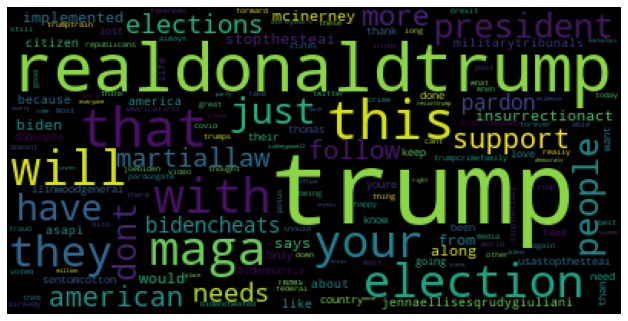

Went to the grocery in my very Red town today wearing my BidenHarris sweatshirt white men told me they liked my sweatshirt If you knew where I am from you would know what a big deal this is bidenharis Biden KamalaHarris


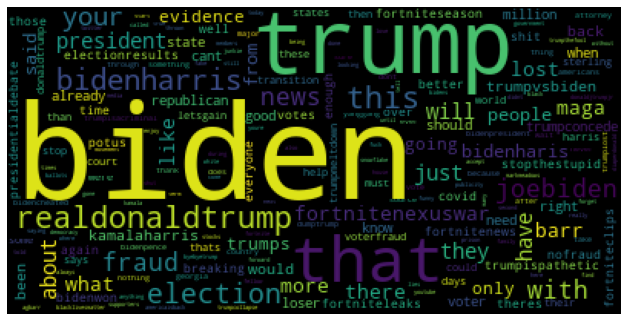

Call Congress and demand Section be removed from the defense authorization actit protects Facebook and Twitterand demand to know why this is in the defense authorization act tcot MAGA


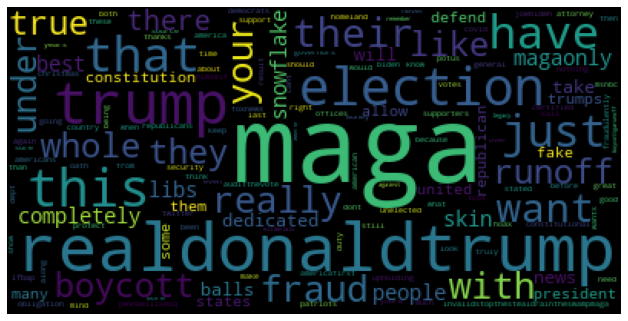

Remaining states to certify votesTodayNH Dec OR CT WA Dec IL Dec NY Dec MD NJ States finalize electors Dec CA Dec Electors voteBidenHarris BidenHarrisTransition


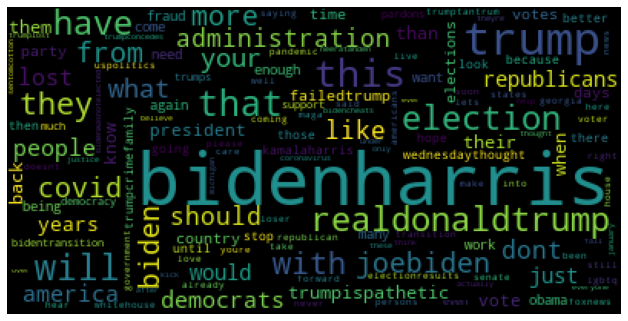

In [77]:
t1 = tweet_pull("trump2020")
t2 = tweet_pull("biden2020")
t3 = tweet_pull("maga")
t4 = tweet_pull("bidenharris")

#column_names = ['trump2020', 'biden2020', 'maga', 'bidenharris']

In [78]:
print(tweet_pull_tweets[0])

type(tweet_pull_tweets)

test = DataFrame(tweet_pull_tweets).transpose()

test.columns = column_names


['KAG MAGA TCOT Trump CCOTIllegitimateElection IllegitimatePresidentRogueGoverment DEMANDS InsurrectionAct', 'HollyVienna I Follow Back All MAGATrump BidenCheatedDeportCommunists', 'Make your plans now to go to Georgia and support Trump and two great Republicansfor the win TrumpTheWin TrumpTrump', 'Yup Looks like a Commie hat jenpsaki therealrussiancollusion liberalcommiecentral fakenews in the MSM fsctchecking Trump TrumpBestPresidentEver AMERICAISBACK AmericaFirst MAGA', 'Live Coverage for Stop the Steal Rally in Georgia pm Tuesday today StopTheSteal KAG TRUMP Trump BidenCheats BidenCheats BidenCheats BidenCheats BidenCheats BidenCheats BidenCheats BidenCheats BidenCheats BidenCheats KAG', 'BBCBreakfast THEY HAVE BEEN FOREGOING ANIMAL TESTING AND WENT RIGHT TO PEOPLE THIS CRAP IS DANGEROUS AND NOT SAFE FOR ANYONEEUGENICISTS THIS IS GEARED TOWARD DEPOPULATION AND GENOCIDE GlobalistGarbage CovidHoax COVID COVIDSecondWave IS A LIE DemocratsHateAmerica Trump', 'CNNTapes James OKeefe inte

In [79]:
test.columns

test.to_csv('/content/drive/My Drive/IST 736 Project/Full Tweets A.csv')

In [80]:
file1 = pd.concat([t1, t2, t3, t4], join = "outer").fillna(0)

file2 = file1.drop(['Label', 'Vectorizer', 'party'], axis=1)

file2.insert(0, 'Vectorizer', file1['Vectorizer'])

file2.insert(0, 'Label', file1['Label'])

file2.insert(0, 'Party', file1['party'])

In [81]:
file2.to_csv('/content/drive/My Drive/IST 736 Project/Twitter Topic.csv')

In [82]:
for i in (np.unique(file2['Label'])):
  print(i, '\t', len(file1[file1['Label']== i]))

biden2020 	 750
bidenharris 	 750
maga 	 750
trump2020 	 750


In [83]:
# search for specific users/ democrats republicans

# hannity, don lemon, nancy pelosi, donald trump, lindsey graham, elizabeth warren, bernie sanders, mitt romney, AOC, 

In [84]:
tweet_pull_tweets = []
column_names = []

def tweet_user_pull(searchhashtag, party_selection):
  # Create a custom search term and define the number of tweets
  p = searchhashtag

  search_term = p + "-is:retweet"

  tweets = tw.Cursor(api.user_timeline,
                     id=searchhashtag ,
                     tweet_mode = 'extended'
                     ).items(n_tweets)

    # Remove URLs
  tweets_no_urls = [remove_url(tweet.full_text) for tweet in tweets]
  print("\n\nUser: ", searchhashtag)
  print(tweets_no_urls[5])
  
  tweet_pull_tweets.append(tweets_no_urls)
  column_names.append(searchhashtag)

  # vectorize the full tweets 

  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.feature_extraction.text import TfidfVectorizer
  from wordcloud import WordCloud

  myCV1 = CountVectorizer(input="content", stop_words = new_stopwords2, token_pattern = regex1)

  CV = myCV1.fit_transform(tweets_no_urls)

  MyColumnNames= myCV1.get_feature_names()
  VectorizedDF_Text=pd.DataFrame(CV.toarray(),columns=MyColumnNames)

  new_data_frame = VectorizedDF_Text
  
  # build WordCloud
  d1 =VectorizedDF_Text.sum(axis = 0)

  d2 = pd.DataFrame(d1.iloc[2:,].sort_values(ascending = False)).reset_index()

  d2.columns = ['Word','Count']

  tuples = [tuple(i) for i in d2.values]

  wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
  plt.figure(figsize=(11,7))
  plt.imshow(wordcloud) 
  plt.axis('off')
  plt.show()

  # add label, create dataframe output
  VectorizedDF_Text['Label'] = searchhashtag
  VectorizedDF_Text['Vectorizer'] = "CV (Not Binary)"

  Empty_DF = DataFrame()
  
  output = pd.concat([Empty_DF, VectorizedDF_Text], join = "outer")

  myCV2 = CountVectorizer(input="content", binary = True, stop_words = new_stopwords2, token_pattern = regex1)

  CV = myCV2.fit_transform(tweets_no_urls)

  MyColumnNames= myCV2.get_feature_names()
  VectorizedDF_Text=pd.DataFrame(CV.toarray(),columns=MyColumnNames)

  # add label, create dataframe output
  VectorizedDF_Text['Label'] = searchhashtag
  VectorizedDF_Text['Vectorizer'] = "CV (Binary)"

  Empty_DF = DataFrame()
  
  output = pd.concat([output, VectorizedDF_Text], join = "outer")
  
  myTF1 = TfidfVectorizer(input="content", stop_words = new_stopwords2, token_pattern = regex1)

  CV = myTF1.fit_transform(tweets_no_urls)

  MyColumnNames= myTF1.get_feature_names()
  VectorizedDF_Text=pd.DataFrame(CV.toarray(),columns=MyColumnNames)

  # add label, create dataframe output
  VectorizedDF_Text['Label'] = searchhashtag
  VectorizedDF_Text['Vectorizer'] = "TF_IDF"

  Empty_DF = DataFrame()
  
  output = pd.concat([output, VectorizedDF_Text], join = "outer")

  output['party'] = party_selection


  return(output)



In [85]:
d1 = tweet_user_pull("housegop", "Republican")
d2 = tweet_user_pull("SpeakerPelosi", "Democrat")
d3 = tweet_user_pull("AOC", "Democrat")
d4 = tweet_user_pull("MittRomney", "Republican")
d5 = tweet_user_pull("seanhannity", "Republican")
d6 = tweet_user_pull("donlemon", "Democrat")
d7 = tweet_user_pull("lindseygrahamSC", "Republican")
d8 = tweet_user_pull("SenWarren", "Democrat")
d9 = tweet_user_pull("berniesanders", "Democrat")
d10 = tweet_user_pull("TuckerCarlson", "Republican")
d11 = tweet_user_pull("barackobama", "Democrat")
d12 = tweet_user_pull("tedcruz", "Republican")
d13 = tweet_user_pull("foxnews", "Republican")
d14 = tweet_user_pull("msnbc", "Democrat")
d15 = tweet_user_pull("kellyannepolls", "Republican")
d16 = tweet_user_pull("maddow", "Democrat")
d17 = tweet_user_pull("gop", "Republican")
d18 = tweet_user_pull("housedemocrats", "Democrat")

Output hidden; open in https://colab.research.google.com to view.

In [86]:
file1 = pd.concat([d1, d2, d3, d4,
                   d5, d6, d7, d8,
                   d9, d10, d11, d12,
                   d13, d14, d15, d16,
                   d17, d18], join = "outer").fillna(0)

file2 = file1.drop(['Label', 'Vectorizer', 'party'], axis=1)

file2.insert(0, 'Vectorizer', file1['Vectorizer'])

file2.insert(0, 'Label', file1['Label'])

file2.insert(0, 'Party', file1['party'])


In [87]:
print(tweet_pull_tweets[0])

type(tweet_pull_tweets)

test = DataFrame(tweet_pull_tweets).transpose()

test.columns = column_names

test.columns

test.to_csv('/content/drive/My Drive/IST 736 Project/Full Tweets B.csv')

['RT RepRiggleman This weeks agenda shows SpeakerPelosi s priorities Enough Politics cannot take precedent over American families and', 'COVID relief Authorizing unused Paycheck Protection Program funds Additional funding for PPE None of that can get voted on but Pelosis marijuana legalization and exotic animal ban can WATCH RepMichaelWaltz', 'RT RepMarkWalker Reminder As Republicans pushed for relief for small businesses amp their families in the fall Chuck Schumer blocked it i', 'RT RepHagedorn Another week in Congress another week of SpeakerPelosi delaying relief to American small businesses and workers Whats', 'RT WaysandMeansGOP Pelosi is blocking a bill to deliver unused Paycheck Protection Program funds to workers and small businessesInstea', 'Lions and tigers and pot oh my Democrats priorities are out of touch with the needs of struggling families and small businesses The American people deserve better', 'RT JudiciaryGOP Dont forget Democrats want to pay states to let criminals

In [88]:

file2.to_csv('/content/drive/My Drive/IST 736 Project/Twitter User Search.csv')



In [89]:
for i in (np.unique(file1['Label'])):
  print(i, '\t', len(file1[file1['Label']== i]))


AOC 	 750
MittRomney 	 750
SenWarren 	 750
SpeakerPelosi 	 750
TuckerCarlson 	 750
barackobama 	 750
berniesanders 	 750
donlemon 	 750
foxnews 	 750
gop 	 750
housedemocrats 	 750
housegop 	 750
kellyannepolls 	 750
lindseygrahamSC 	 750
maddow 	 750
msnbc 	 750
seanhannity 	 750
tedcruz 	 750


In [90]:

for i in (np.unique(file1['Vectorizer'])):
  print(i)

CV (Binary)
CV (Not Binary)
TF_IDF


In [91]:
(file2.Label == "realdonaldtrump").sum()

0

In [92]:

for i in (np.unique(file2['Party'])):
  print(i)

Democrat
Republican


In [93]:
def just_tweet_user_pull(searchhashtag):
  # Create a custom search term and define the number of tweets
  p = searchhashtag

  search_term = p + "-is:retweet"

  tweets = tw.Cursor(api.user_timeline,
                     id=searchhashtag ,
                     tweet_mode = 'extended'
                     ).items(n_tweets)

    # Remove URLs
  tweets_no_urls = [remove_url(tweet.full_text) for tweet in tweets]
  print("\n\nUser: ", searchhashtag)
  n_range = range(0,10)
  for i in n_range:
    print('\n', tweets_no_urls[i])
  

In [94]:
just_tweet_user_pull("realdonaldtrump")



User:  realdonaldtrump

 Will be going to Georgia for a big Trump Rally in support of our two great Republican Senators David and Kelly They are fantastic people who love their Country and love their State We must work hard and be sure they win USA

 

 

 Thank you to SenTomCotton for the really nice words on all we are doing and have done We will win

 RT realDonaldTrump

 RT realDonaldTrump Pardon investigation is Fake News

 RT PlaysTrumpCard Without shred of actual evidence that realDonaldTrump did anything wrong the DOJ went ballistic on himDid a Norma

 Big voter fraud hearings today in the Great State of Michigan This election is a far bigger scandal FRAUD than anyone would have thought not even close Watch today

 

 


In [95]:
just_tweet_user_pull("barackobama")



User:  barackobama

 We started the ObamaFoundation to help a new generation build a better tomorrow And many of them already are stepping up through the pandemic and protests to demand real changeOn Giving Tuesday Im asking you to invest in them

 Lets all do our part this Thanksgiving to keep people safe and healthy Celebrate virtually if you can Wear a mask And as always listen to the experts The choices you make could save lives

 The balance of power in the Senate is at stake in Georgias runoff election Weve got two great candidatesReverendWarnock and Ossoffwho need your support Go to to find ways to get involved

 Michelle and I are eager to bring the Obama Presidential Center to our hometowna way to honor the city we love all those who came before us and pay tribute to people coming together to do extraordinary things

 RT ObamaFoundation Watch Now BarackObama joins MBKAlliance youth and community leaders and CapehartJ for a conversation about leader

 This was fun I heard Tim

In [96]:
just_tweet_user_pull("kamalaharris")



User:  kamalaharris

 RT JoeBiden From the most unequal economic and jobs crisis in modern history we can build a new American economy that works for everyone

 Cases of COVID are spiking And beyond the tragic loss of life the toll of this pandemic continues to mount Wear a mask Wash your hands Social distance We can get through this together

 Presidentelect JoeBiden and Iwith this economic teamwill be ready to hit the ground running on day one Because thats what this crisis demands and what the American people deserve

 Rosa Parks sparked a movement on this day in when she refused to give up her bus seat Today lets honor her legacy and the courage she embodied by living by her words To bring about change you must not be afraid to take the first step We will fail when we fail to try

 RT Transition Statement by Presidentelect Biden on the US Supreme Court case on the Census

 The economic team JoeBiden and I introduced today are proven leaders whose talents achievements and life sto

In [97]:
just_tweet_user_pull("joebiden")



User:  joebiden

 From the most unequal economic and jobs crisis in modern history we can build a new American economy that works for everyoneBut we need to act now and we have to work together

 Today I was proud to announce key nominations and appointments for critical economic positions in the BidenHarris administrationA firstrate team that will get us through the economic crisis and help build our economy back better than before

 RT Transition Statement by Presidentelect Biden on the US Supreme Court case on the Census

 RT KamalaHarris Rosa Parks sparked a movement on this day in when she refused to give up her bus seat Today lets honor her legacy

 This World AIDS Day Jill and I join with communities around the globe to remember those weve lost Because of the hard work of advocates activists and frontline workers an AIDSfree generation is within reach and my administration will work tirelessly to make it a reality

 days until we make history and can call KamalaHarris Madam Vi

In [98]:
a = pd.read_csv('/content/drive/My Drive/IST 736 Project/Twitter User Search.csv')
b = pd.read_csv('/content/drive/My Drive/IST 736 Project/Twitter Topic.csv')

In [99]:
a = a.drop('Unnamed: 0', axis = 1)

a.head()

,Party,Label,Vectorizer,ability,about,aboutits,abundance,accel,access,accessing,accoun,achievements,across,actionrepublicans,actually,additional,addressed,addressing,administration,advance,advanced,advanci,after,afternoon,again,against,agenda,aggressive,agree,ahead,airlift,alert,alivio,allocated,allow,almost,along,already,always,americ,...,thanking,theestallion,theheroesact,themweareth,thingpass,tiny,tirelessly,togetherprotect,togetheryour,towear,transportation,transportationshe,triage,trumpfcc,uninsuredhouse,unitebehindthesciencenot,universal,usstill,veteranowned,veteranssmallbusinessw,vicepresident,violenceblacklivesmatter,virtuallythank,virushelp,virusnot,voicegovote,vulnerableshe,wampanoag,warrants,wearamask,weareth,wellconnectedhouse,weput,whiteribbonva,womenhouse,workcreate,workforcethe,worldmentalhealthday,worldpostday,wreaking
0,Republican,housegop,CV (Not Binary),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Republican,housegop,CV (Not Binary),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Republican,housegop,CV (Not Binary),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Republican,housegop,CV (Not Binary),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Republican,housegop,CV (Not Binary),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
b = b.drop('Unnamed: 0', axis = 1)
b.head()

,Party,Label,Vectorizer,abandon,abcnews,abigailcfrye,abject,able,about,absolutely,accept,accomplished,according,account,accounts,accurate,action,actual,actually,adamschefter,adamschiff,adjudicator,administration,admiredmr,admission,adriennednc,aehrnbsn,afraid,after,again,against,agenda,agent,agree,ahead,aheadjus,alevels,allegedly,allies,allonly,...,weakarse,wednesdaymotivation,weekhowd,weight,wellbyedon,welx,whine,whineylittlebs,whocareswherebidenharris,wholl,whom,whopping,whyrealdonaldtrump,wiassemblygop,wild,willbrentp,wind,wishing,wither,witness,wkow,wnot,womensbidenharris,womensrightsarehumanrights,wordsdawn,works,workunity,worldbidenharris,worlds,worshippers,wray,wrote,wsjbusiness,xmillrunner,yesthe,youbidenharris,youvotedforthis,zaraindc,zero,zombieswhat
0,No-Detail,trump2020,CV (Not Binary),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,No-Detail,trump2020,CV (Not Binary),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,No-Detail,trump2020,CV (Not Binary),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,No-Detail,trump2020,CV (Not Binary),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,No-Detail,trump2020,CV (Not Binary),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
c = pd.concat([a, b], join = "outer").fillna(0)

In [ ]:
c.head()

In [ ]:
c.to_csv('/content/drive/My Drive/IST 736 Project/Final Table.csv')